In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Result 1
This results apply when:
* $\alpha \neq 0$
* $v=1$
* $T_A = T_B = T$

In [11]:
def evolution0(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old ** 2)*(1+b-c)*(1-(1-p_old)*(1-alpha)*T_B)
        x2 = p_old*(1-p_old)*(1-c)*(p_old*(1-alpha)*T_B+1-T_B)
        x3 = p_old*(1-p_old)*(1+b)*(p_old*(1-alpha)+alpha)*T_A
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        omega = 1+p_old*(b-c)
        result = (x1+x2+x3+x4)/omega
        p.append(result)
        if result > 1:
            break

    return p

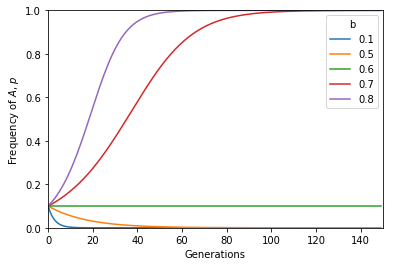

In [12]:
p0 = 0.1
c = 0.9
T_A =0.6
T_B = 0.6
alpha = 1
generations = 150

for b in (0.1, 0.5, 0.6, 0.7, 0.8):
    plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=b)

plt.xlabel('Generations')
plt.ylabel('Frequency of $A$, $p$')
plt.ylim(0, 1)
plt.xlim(0, generations)
plt.legend(title='b')

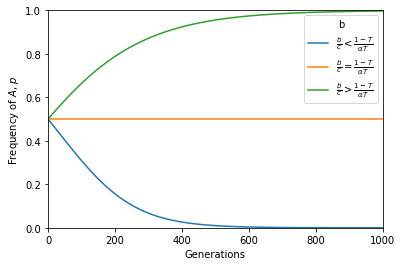

In [17]:
p0 = 0.5
c = 0.1
T_A =0.2
T_B = 0.2
alpha = 0.5
generations = 1000

b = 0.7
plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} < \frac{1-T}{\alpha T}$')
b = 0.8
plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} = \frac{1-T}{\alpha T}$')
b = 0.9
plt.plot(evolution0(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} > \frac{1-T}{\alpha T}$')
plt.legend(title='b')
plt.xlabel('Generations')
plt.ylabel('Frequency of $A$, $p$')
plt.ylim(0, 1)
plt.xlim(0, generations);
plt.savefig('figure_first_result.png')

## Result 1.2 - No correlation between transmission and cooperation
Applies when:
* $\alpha = 0$
* $v=1$



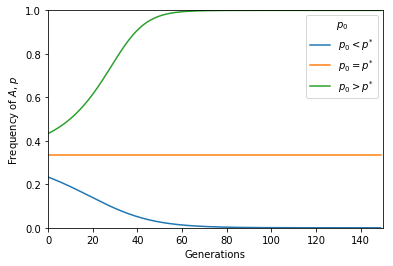

In [19]:
b = 0.6
c = 0.5
T_A = 0.475
T_B = 0.1
alpha = 0
generations = 150

p_star = c*(1-T_B)/(b*(T_A-T_B))-1/b
plt.plot(evolution0(p_star-0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 < p^{*}$')
plt.plot(evolution0(p_star, b, c, T_A, T_B, alpha, generations), label=r'$p_0 = p^{*}$')
plt.plot(evolution0(p_star+0.1, b, c, T_A, T_B, alpha, generations), label=r'$p_0 > p^{*}$')
plt.legend(title=r'$p_0$')
plt.xlabel('Generations')
plt.ylabel('Frequency of $A$, $p$')
plt.ylim(0, 1)
plt.xlim(0, generations);
plt.savefig('figure_equilibrium.png')

## Result 2
Applies:
* $v=0$

In [21]:
def evolution2(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]

    for t in range(1, tmax):
        p_old = p[t-1] 
        x1 = (p_old**2)*(alpha+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x2 = p_old*(1-p_old)*(alpha*(1-T_B)+(1-alpha)*(p_old+(1-p_old)*(1-T_B)))
        x3 = p_old*(1-p_old)*(alpha*T_A+(1-alpha)*p_old*T_A)
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        result = (x1+x2+x3+x4)
        p.append(result)
        if result > 1:
            break

    return p

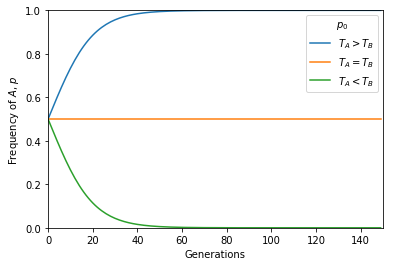

In [22]:
p0 = 0.5
b = 0.9
c = 0.5
T_A = 0.5
alpha = 0.51
generations = 150

T_B = T_A - 0.1 # 0.4
plt.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A > T_B$')
T_B = T_A # 0.5
plt.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A = T_B$')
T_B = T_A + 0.1 # 0.6
plt.plot(evolution2(p0, b, c, T_A, T_B, alpha, generations), label=r'$T_A < T_B$')
plt.legend(title=r'$p_0$')
plt.xlabel('Generations')
plt.ylabel('Frequency of $A$, $p$')
plt.ylim(0, 1)
plt.xlim(0, generations);
plt.savefig('figure_v0.png')

## Draft

In [2]:
def evolution4(p0, b, c, T_A, T_B, alpha, tmax):
    p = [p0]
    p_adult = [p0]
    ratio = [1]

    for t in range(1, tmax):
        p_old = p[t-1] 
        p_old_adult = p_adult[t-1]
        x1 = (p_old ** 2)*(1+b-c)*(1-(1-p_old)*(1-alpha)*T_B)
        x2 = p_old*(1-p_old)*(1-c)*(p_old*(1-alpha)*T_B+1-T_B)
        x3 = p_old*(1-p_old)*(1+b)*(p_old*(1-alpha)+alpha)*T_A
        x4 = ((1-p_old)**2)*p_old*(1-alpha)*T_A
        omega = 1+p_old*(b-c)
        parent = (x1+x2+x3+x4)/omega
        adult = (p_old**2)*(T_B-T_A)+p_old*(1+T_A-T_B)
        p.append(parent)
        print('parent' + str(parent))
        print('adult' + str(adult))
        p_adult.append(adult)
        ratio.append(parent/adult)
        
    return ratio

parent0.4348837209302326
adult0.42400000000000004
parent0.4711190604536335
adult0.45945970795024343
parent0.5084145050573076
adult0.49603564958672547
parent0.5464182303927513
adult0.5334074246677717
parent0.5847249133480866
adult0.571202765181472
parent0.6228878014925386
adult0.6090070822539025
parent0.6604360450255428
adult0.6463776603169717
parent0.696896511701568
adult0.682862072571199
parent0.7318184157515903
adult0.7180196880695435
parent0.7647982917205419
adult0.7514444379634326
parent0.7955023756317157
adult0.7827864781907303
parent0.8236835303021479
adult0.8117702102313169
parent0.8491905514610075
adult0.8382064275232618
parent0.8719689024649442
adult0.8619971473380434
parent0.8920533488495249
adult0.8831328160248467
parent0.9095542186298796
adult0.9016827660151122
parent0.9246397858310873
adult0.9177807528301267
parent0.9375174316536312
adult0.9316078910600202
parent0.9484158556417903
adult0.9433752813535523
parent0.957569903708263
adult0.9533081776826945
parent0.9652087979335

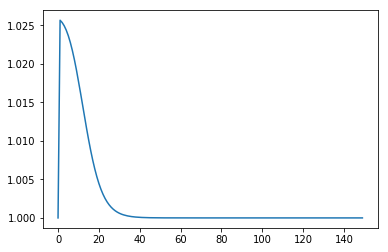

In [9]:
p0 = 0.4
c = 0.9
T_A =0.7
T_B = 0.6
alpha = 1
generations = 150

b = 0.55
plt.plot(evolution4(p0, b, c, T_A, T_B, alpha, generations), label=r'$\frac{b}{c} < \frac{1-T}{\alpha T}$')